In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
# Importing the Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the csv file and checking the first five rows
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Checking for the shape of the dataset
df.shape

(145460, 23)

So, there are 1 lakh 45k rows with 23 features

In [5]:
# Checking the basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Except the date column, all other features are identified with their right datatype
Let's change the dtype of the date column.

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Creating different columns based on the date feature, for further usage
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Specific_Day']= df['Date'].dt.day

In [8]:
# Checking for null values in the dataset
(df.isnull().sum()/len(df) *100).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
RainToday         2.241853
Rainfall          2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Month             0.000000
Year              0.000000
Date              0.000000
Location          0.000000
Specific_Day      0.000000
dtype: float64

#### We can see that, only 5 columns does not have null values. For the columns with null values accounting to less than 7%, these null values can be dropped and the null values in the rest of the columns should be replaced with median or mode depending on its datatype

In [9]:
# Let us first drop the null values from the columns which has less than 7% null values 
df = df.dropna(subset=['MaxTemp','MinTemp','WindSpeed9am','Temp9am','Humidity9am','WindSpeed3pm','Rainfall','RainToday'
                      ,'RainTomorrow','Temp3pm','WindDir3pm','Humidity3pm'])

In [10]:
# Filling the null values of the categorical columns with the mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [11]:
# Filling the null values of the numerical columns with the median 
# Since we do not if the features are skewed or not, it is better to fill them with median
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].median())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].median())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure3pm'].median())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())

In [12]:
# Let us check if the null values are all replaced
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Specific_Day     0
dtype: int64

So, the null values are all replaced with appropriate values.

In [13]:
# Checking if there are null values in the form of question mark symbol
df[df=='?'].count()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Specific_Day     0
dtype: int64

#### Distribution of the Target Variable

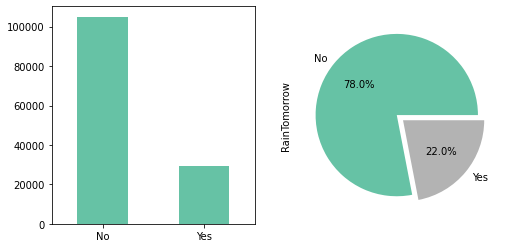

In [14]:
plt.rcParams['figure.figsize'] = 8,4
fig,ax = plt.subplots(1,2)
df['RainTomorrow'].value_counts().plot(kind='bar',rot=0,ax=ax[0],cmap='Set2')
df['RainTomorrow'].value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1],cmap='Set2',explode=[0,0.1])
plt.show()

#### So, there is clear imbalance in our dataset. 

In [15]:
# Creating new dataframe for numerical and categorical variables
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes('object')

In [16]:
# Five point summary of the numeric variables
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Specific_Day
count,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000
mean,12.189509,23.260816,2.314654,5.189728,8.044451,40.008975,14.118055,18.816286,68.659744,51.273891,1017.455849,1015.265713,4.647314,4.687622,16.978469,21.749529,2012.726443,6.403343,15.722022
std,6.375591,7.062406,8.375341,3.183650,2.806034,13.222245,8.832280,8.687083,19.091036,20.754483,6.824140,6.720408,2.297079,2.148247,6.471002,6.923049,2.531479,3.436010,8.797304
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.100000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.400000,1011.000000,3.000000,4.000000,12.300000,16.700000,2010.000000,3.000000,8.000000
50%,12.000000,22.700000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1016.800000,1015.300000,5.000000,5.000000,16.700000,21.200000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.900000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.900000,1019.500000,6.000000,6.000000,21.500000,26.500000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,82.400000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


#### Inferences from the describe function:
* The mintemp varies between -8 and 33, and the mean and median are almost same, so the distribution is not skewed
* The maxtemp varies between -4 and 48, here the mean is slightly higher than the median, so it is slightly skewed
* The rainfall varies between 0 to 371, the mean is clearly higher than the median, so it skewed. So, there are many days with no rainfall. The mean is less but the max is very high, which means that, if it rains, it will be raining heavily, but many days rain was not observed.
* The evaporation varies between 0 and 82, here the mean and median are slightly different, so the distribution is slightly skewed. It is same as observed from rainfall feature, from the mean and median, and also from 75% quantile it is very clear that, most of the days rainfall is not observed, but on days where it is observed, it is high.
* The sunshine varies between 0 and 14, the mean and median are almost equal so it follows a normal distribution. The max is not very high, so there were many sun shiny days.
* The windgustspeed is about a sudden burst of wind speed, it varies between 6 and 135, the mean and median are near so it is slightly skewed, and most of the days this value is less and only in rare cases it was very high.
* The windspeed9am varies between 0 and 87, and the mean and median are slightly different so the distribution is skewed. Similarly, the normal value and the max is very much different, so we can guess that on rainy days the windspeed is high.
* The windspeed3pm varies between 2 and 87, the mean and median are different, so it is skewed. The windspeed at 3pm is usually higher than that at 9am, we can observe that.
* The humidity9am varies between 0 and 100, the mean and median are different, so it is skewed. It is clearly left skewed.
* The humidity39m varies between 0 and 100, the mean and median are different, so it is skewed. It is clearly left and right skewed.
* The Pressure9am varies between 980 and 1041, the mean and median are different, so it is skewed.
* The pressure3pm varies between 977 and 1039, the mean and median are different, so it is skewed. The pressure9am and pressurep3pm are almost the same.
* The colud9am and cloud3pm has almost identical values and both varies between 0 and 9 and the mean and median of them are not same, so it is skewed.
* The temp9am is comparatively less than temp3pm, both are not much skewed.
* The year, month, day are distributed as usual.

### Univariate Analysis

MinTemp :


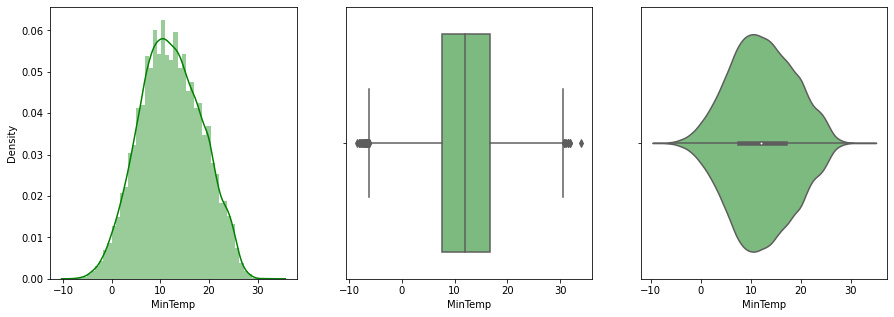

MaxTemp :


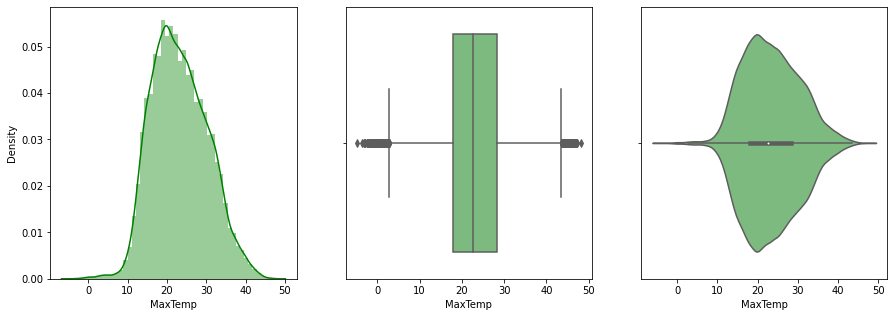

Rainfall :


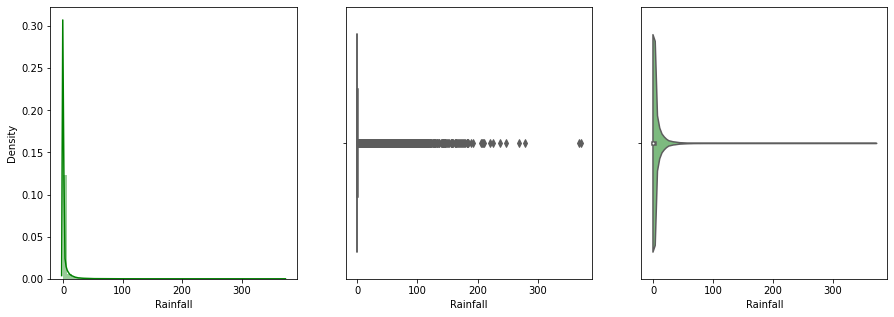

Evaporation :


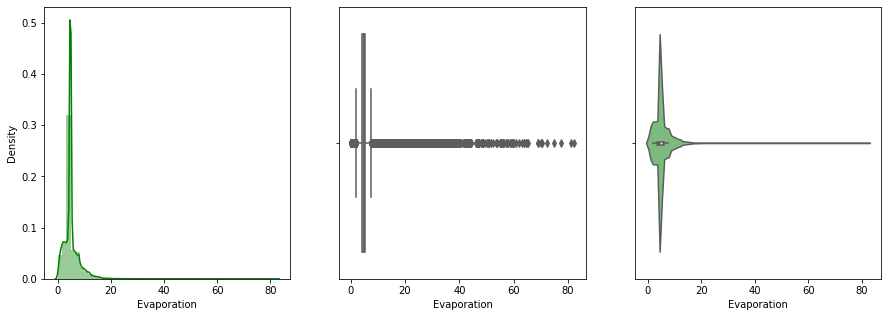

Sunshine :


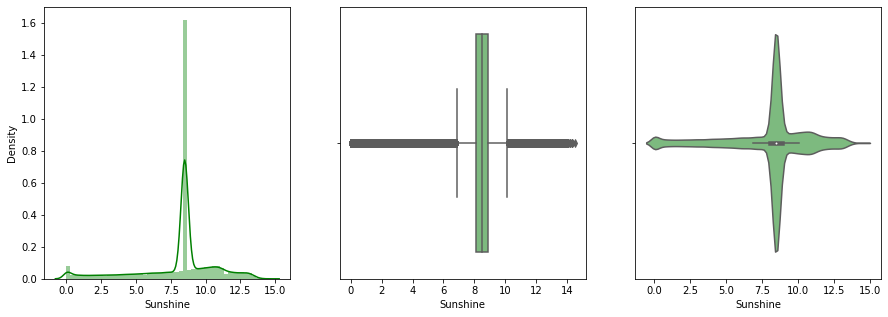

WindGustSpeed :


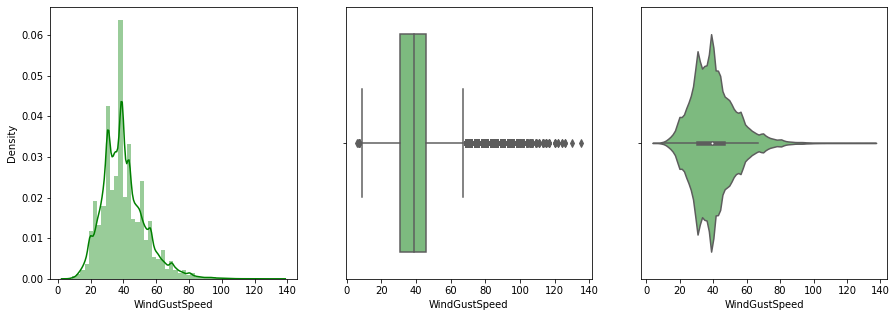

WindSpeed9am :


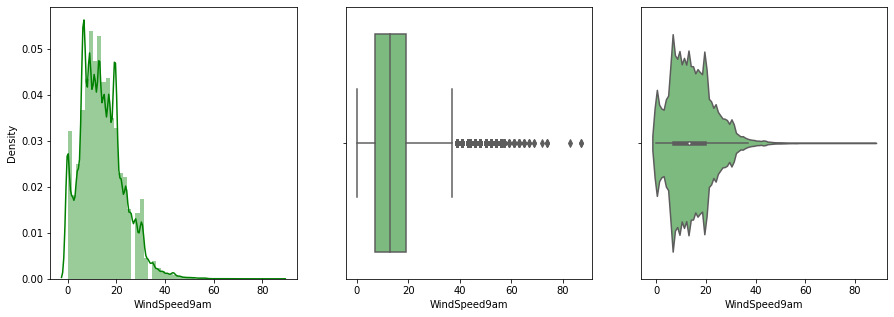

WindSpeed3pm :


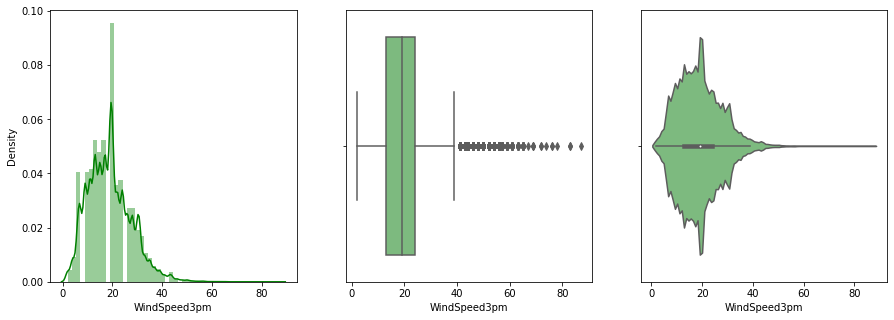

Humidity9am :


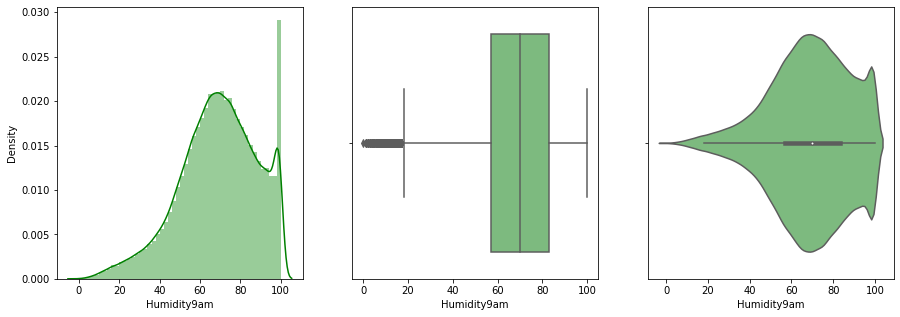

Humidity3pm :


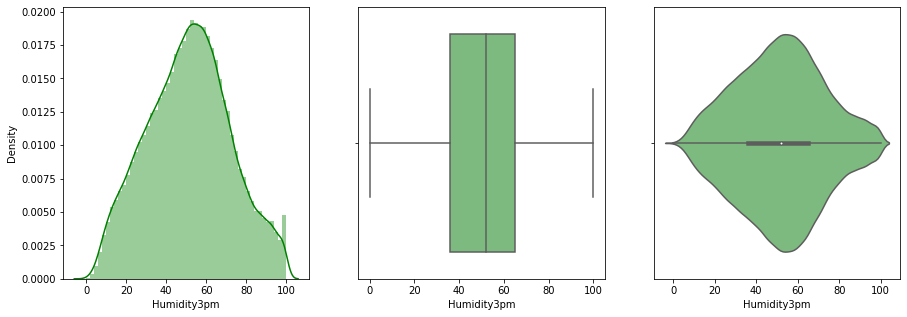

Pressure9am :


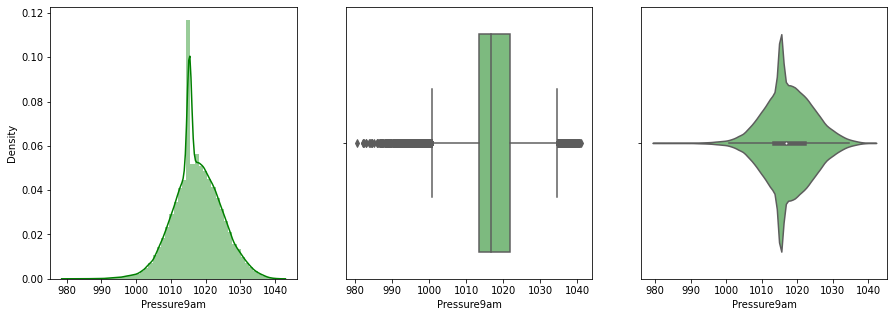

Pressure3pm :


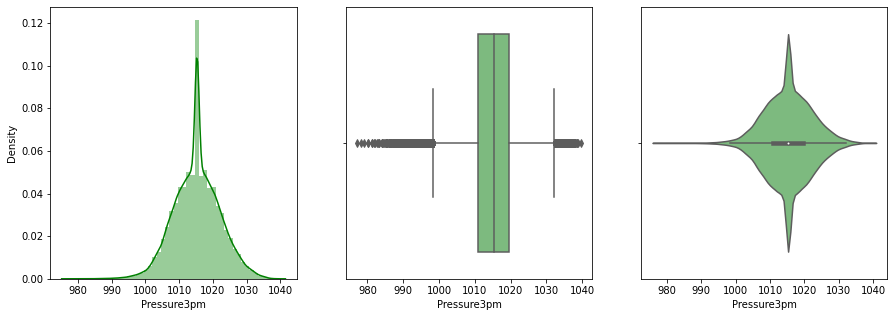

Cloud9am :


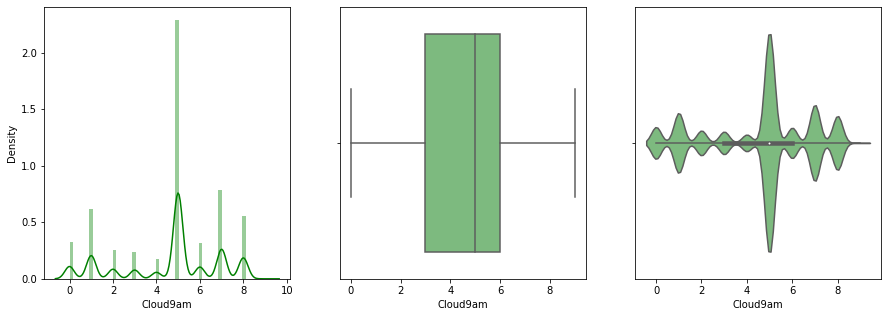

Cloud3pm :


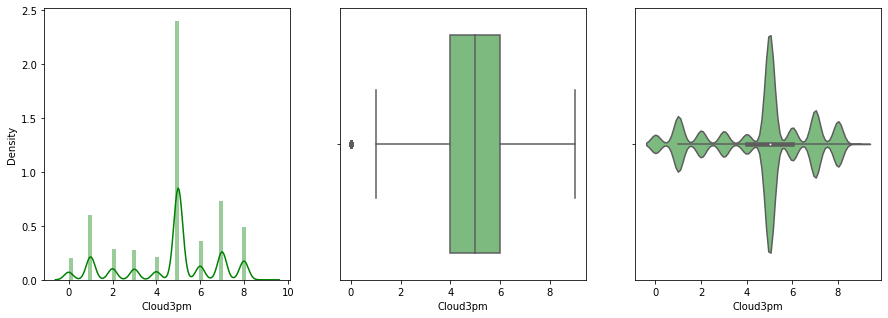

Temp9am :


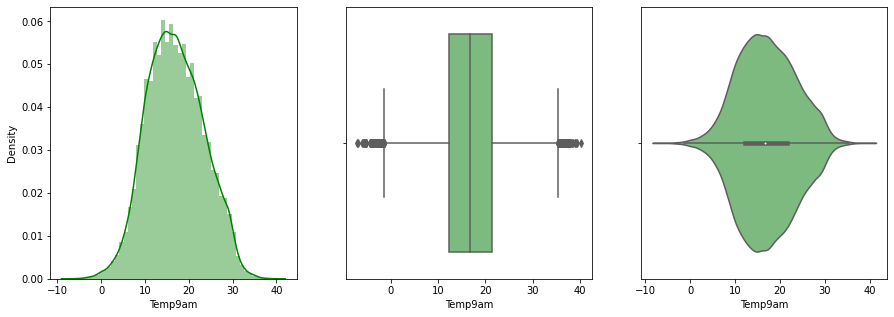

Temp3pm :


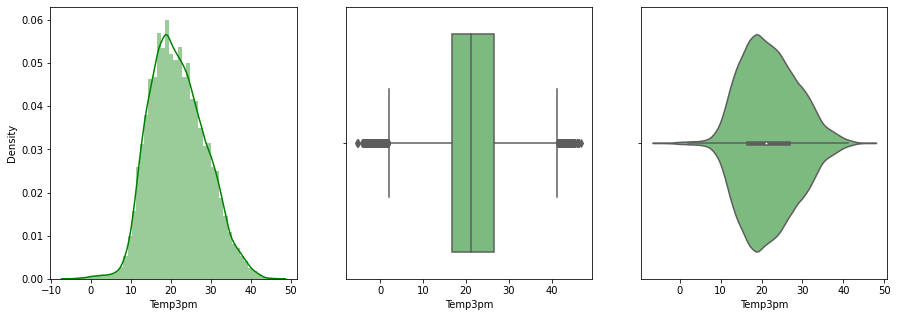

Year :


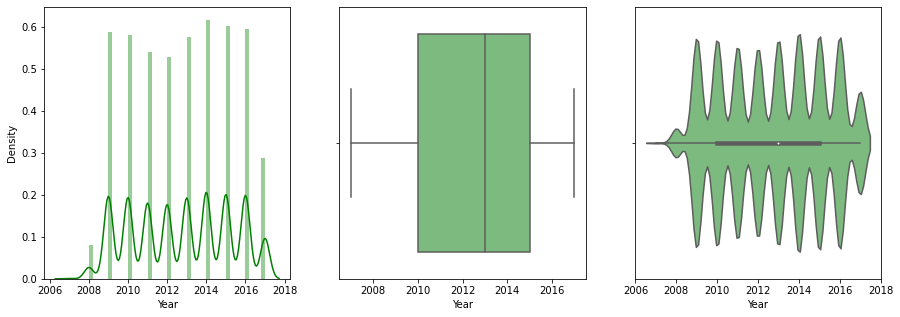

Month :


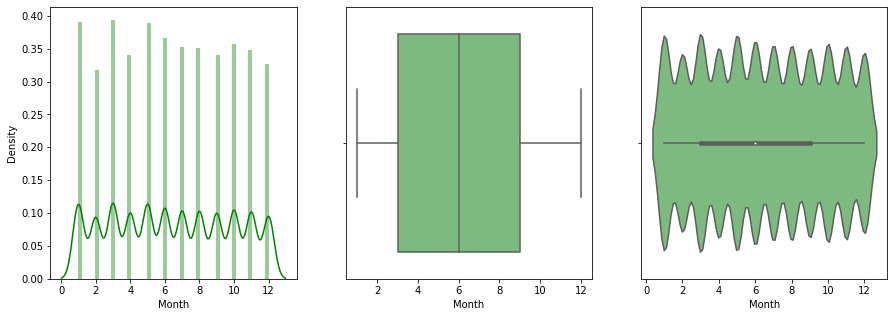

Specific_Day :


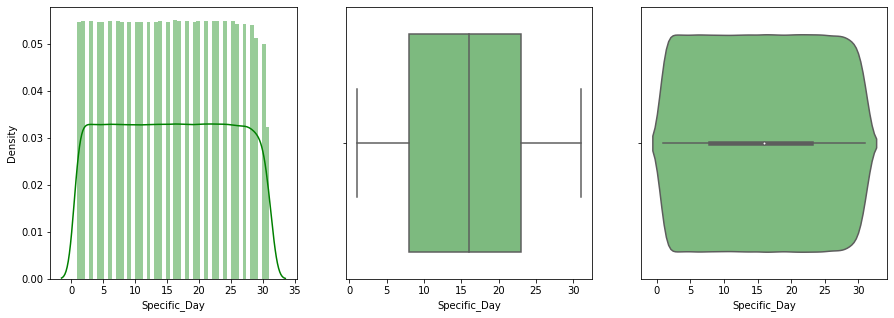

In [17]:
# For the numerical columns
plt.rcParams['figure.figsize'] = 15,5
for col in df.select_dtypes(np.number):
    fig,ax= plt.subplots(1,3)
    print(col,':')
    sns.distplot(df_num[col],ax=ax[0], color='Green')
    sns.boxplot(df_num[col], ax=ax[1], palette='Greens')
    sns.violinplot(df_num[col],ax=ax[2], palette='Greens')
    plt.show()

#### Inferences from the univariate analysis of the numerical columns:
* The mintemp almost follows a normal distribution with outliers in both sides
* Te maxtemp is left skewed more than right skewed
* Rainfall is clearly right skewed and as we saw from describe, the days when rain was there it was high.
* Similar to rainfall, evaporation is highly right skewed, whenever there is rain, it is having higher values
* Sunshine has outliers on both sides, which means there were only less days when the sunshine was warm, many days it was cloudy and equally many days it was a sunshiny day.
* Windgustspeed is right skewed,  as only on rainy days the windgustspeed was very high
* Windspeed9am and Windspeed3pm are right skewed too
* Humidity9am is left skewed and humidity3pm is normally distributed.
* Pressure9am has outliers in both sides and same applies for pressure3pm, the pressure is either too less or too high on rainy days
* Cloud9am and cloud3pm follows almost normal distribution
* Temp9am and temp3pm follows similar distribution with outliers on both sides
* Year, month and specific_day denote 3 columns of the date feature


Location :


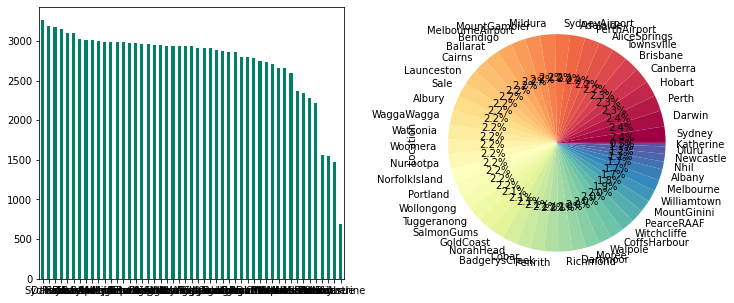

WindGustDir :


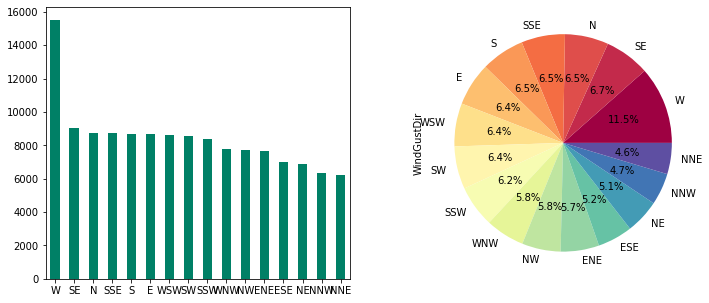

WindDir9am :


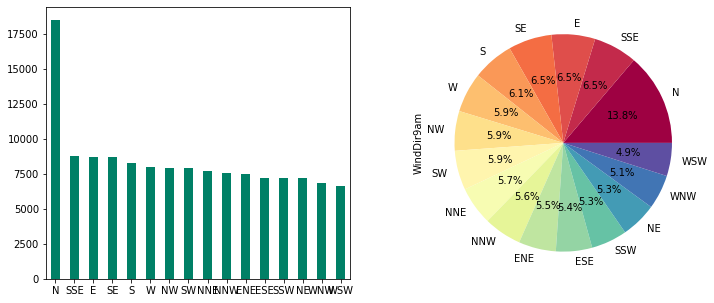

WindDir3pm :


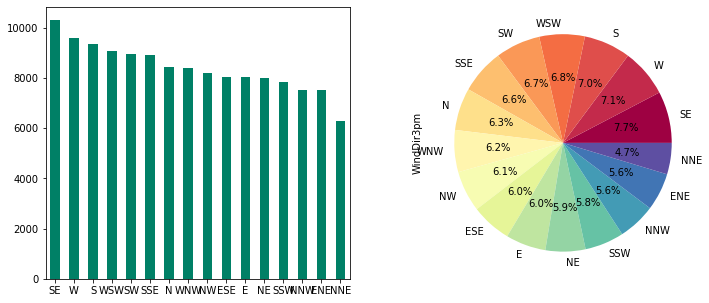

RainToday :


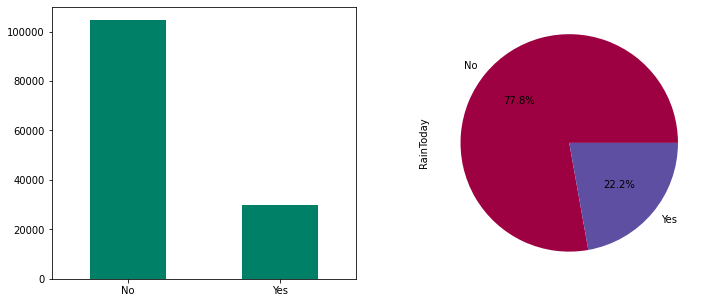

RainTomorrow :


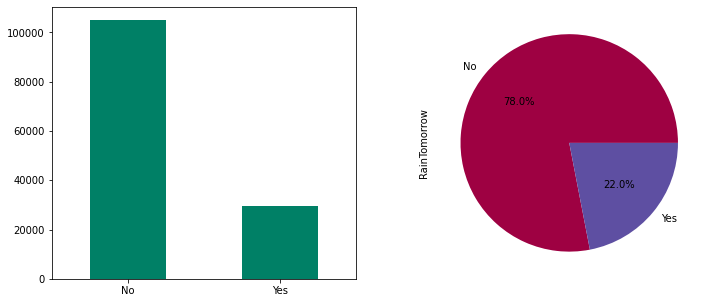

In [18]:
# For the categorical variable
plt.rcParams['figure.figsize'] = 12,5
for col in df_cat:
    fig ,ax = plt.subplots(1,2)
    print(col,':')
    df_cat[col].value_counts().plot(kind='bar',rot=0, ax=ax[0],cmap='summer')
    df_cat[col].value_counts().plot(kind='pie',autopct='%.1f%%',ax=ax[1],cmap='Spectral')
    plt.show()

#### Inferences from the univariate analysis of the Categorical columns
* From the location column we can observe that almost all the locations contribute to the dataset equally
* The windgustdir is more from the West direction compared to all the other directions
* The winddir9am is more from the North direction compared to all the other directions
* The winddir3pm is more from the South-East direction followed almost equally by West and South directions
* As we guessed from univariate of numerical features, most of the days there was no rain only 22% times of the days, rain occurred.

### Bivariate Analysis

MinTemp Vs RainTomorrow



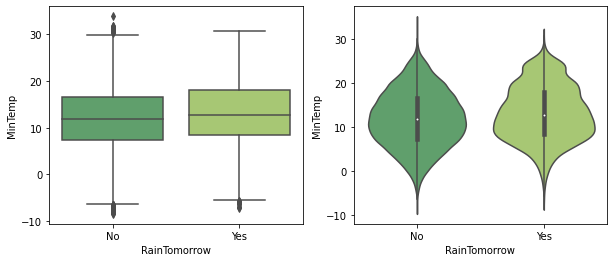

MaxTemp Vs RainTomorrow



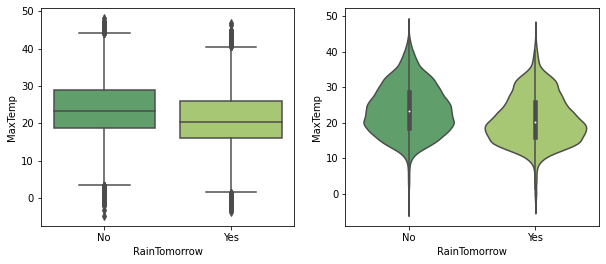

Rainfall Vs RainTomorrow



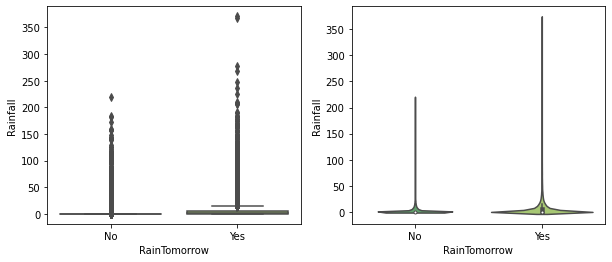

Evaporation Vs RainTomorrow



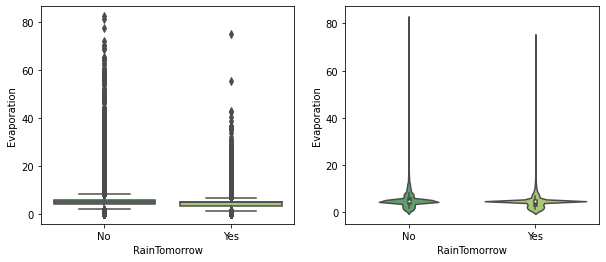

Sunshine Vs RainTomorrow



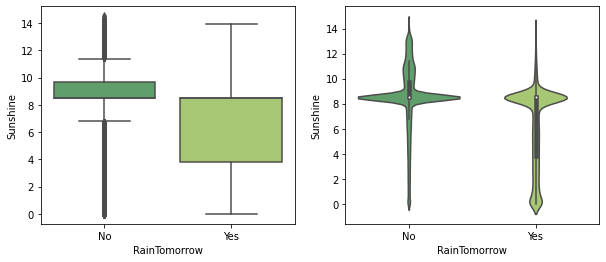

WindGustSpeed Vs RainTomorrow



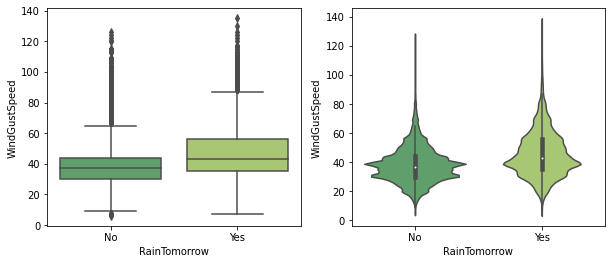

WindSpeed9am Vs RainTomorrow



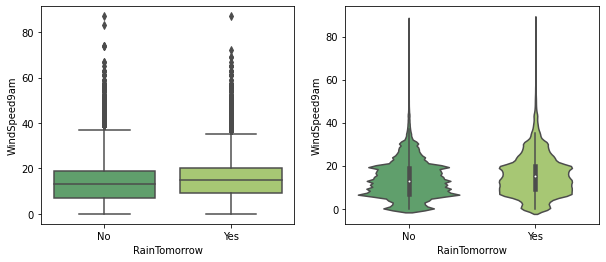

WindSpeed3pm Vs RainTomorrow



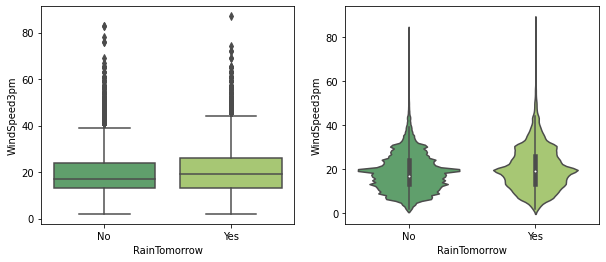

Humidity9am Vs RainTomorrow



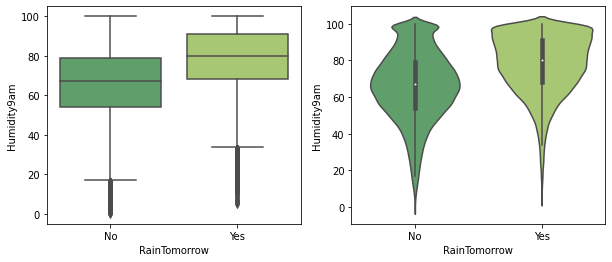

Humidity3pm Vs RainTomorrow



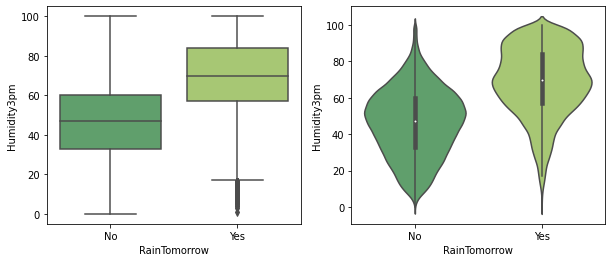

Pressure9am Vs RainTomorrow



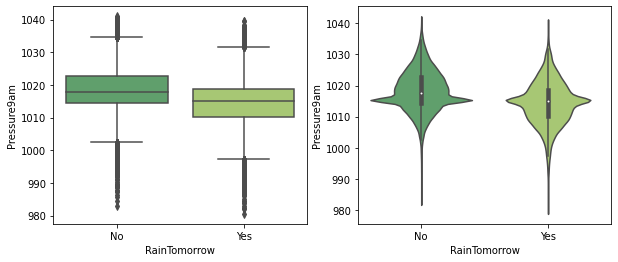

Pressure3pm Vs RainTomorrow



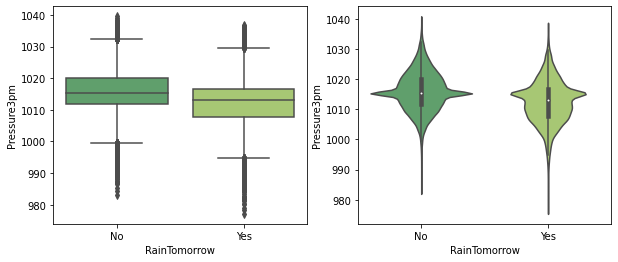

Cloud9am Vs RainTomorrow



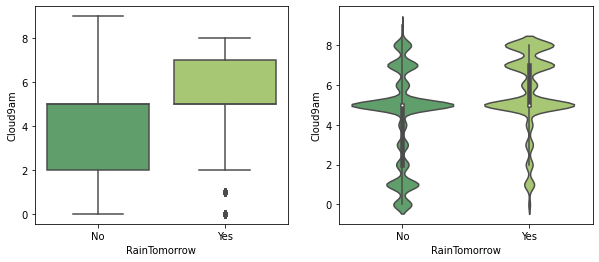

Cloud3pm Vs RainTomorrow



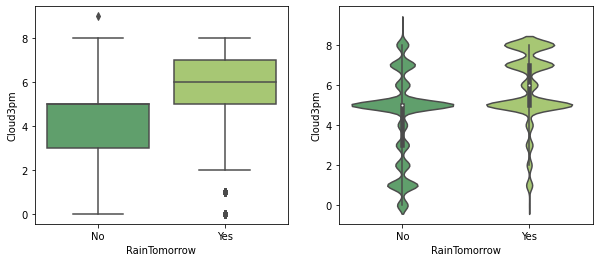

Temp9am Vs RainTomorrow



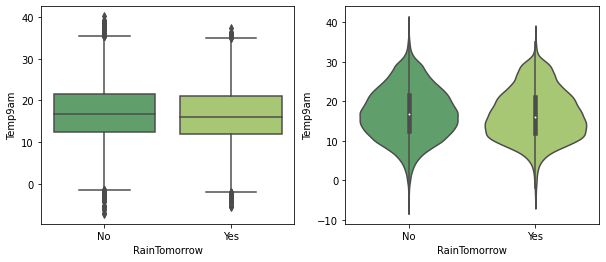

Temp3pm Vs RainTomorrow



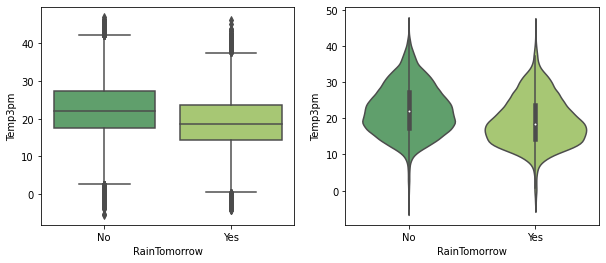

Year Vs RainTomorrow



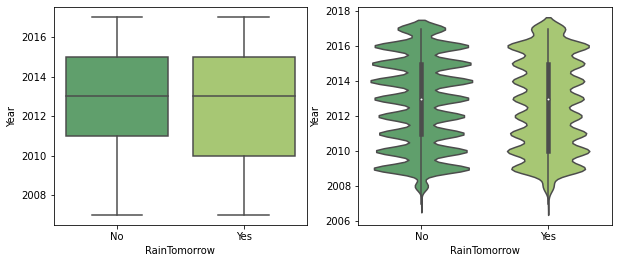

Month Vs RainTomorrow



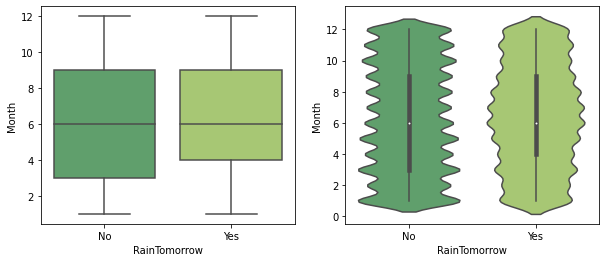

Specific_Day Vs RainTomorrow



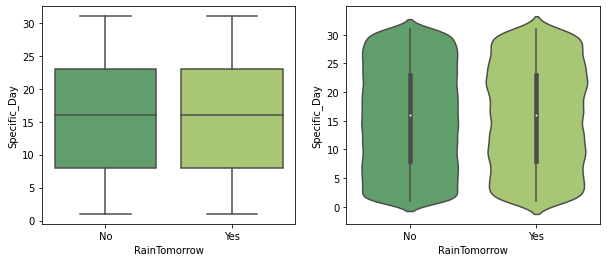

In [19]:
plt.rcParams['figure.figsize']=10,4
for col in df_num:
    fig,ax= plt.subplots(1,2)
    print(col,'Vs RainTomorrow\n')
    sns.boxplot(df['RainTomorrow'],df_num[col],ax=ax[0],palette='summer')
    sns.violinplot(df['RainTomorrow'],df_num[col],ax=ax[1],palette='summer')
    plt.show()

#### Inferences from bivariate analysis of numerical columns:
* Whenever the mintemp is very less and very high, those time, Rain is not observed on the next day
* Maxtemp doesn't seem to have much effect on the RainTomorrow, we can only tell that when the temperature is between 15-25, there are more chances of rain
* As we guessed, most of the times when rainfall value is very high, rain is observed on the following day
* Evaporation is lightly contradictory as, when evaporation value is at its maximum,  rain is not observed the next day, it does not have much effect on Rain tomorrow
* Sunshine is having little effect on raintomorrow as, when sunshine is less,  chances of getting raintomorrow is more
* Windgustspeed, if very high, then surely chances of raintomorrow
* Windspeed9am doesn't seem to have much effect on Raintomorrow as even if it is high, there is almost equal chance for it to rain
* Windspeed3pm if very high, then rain occurs
* More chances of rain when humidity is very high
* Pressure when very less, there are chances of getting rain
* When cloud value is very high, less chances of getting rain tomorrow
* Mostly rain occurs with normal temperature between 10-20 and equal chances of not getting rain
* Year, month and day doesn't seem to have much effect on rain, as it is raining uniformly

Location Vs RainTomorrow



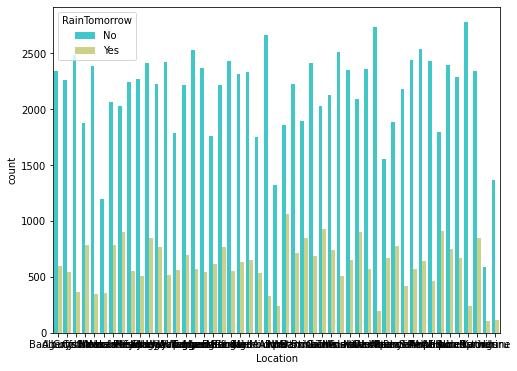

WindGustDir Vs RainTomorrow



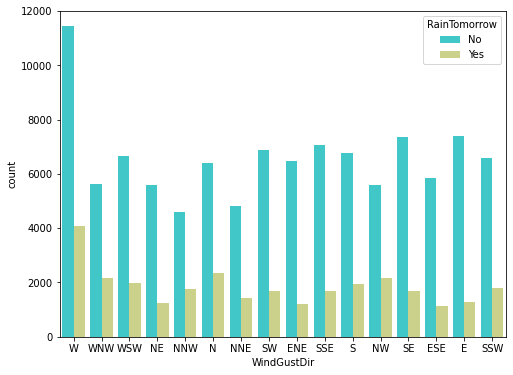

WindDir9am Vs RainTomorrow



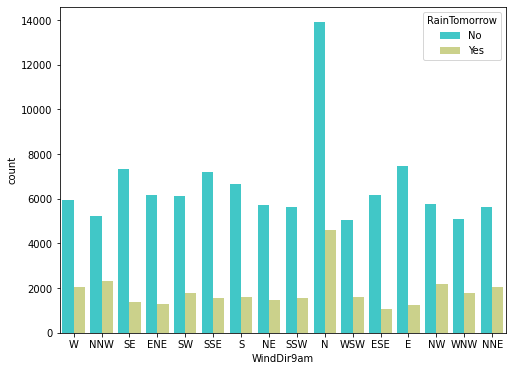

WindDir3pm Vs RainTomorrow



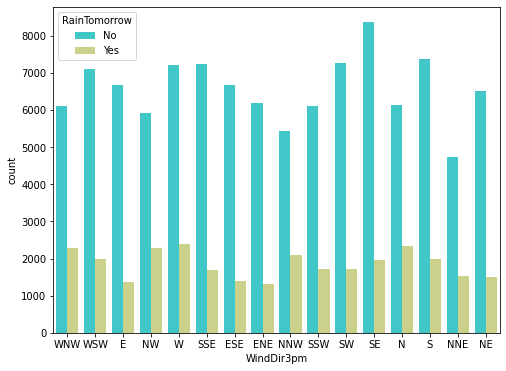

RainToday Vs RainTomorrow



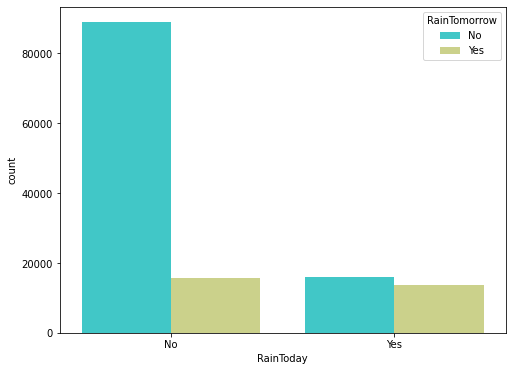

RainTomorrow Vs RainTomorrow



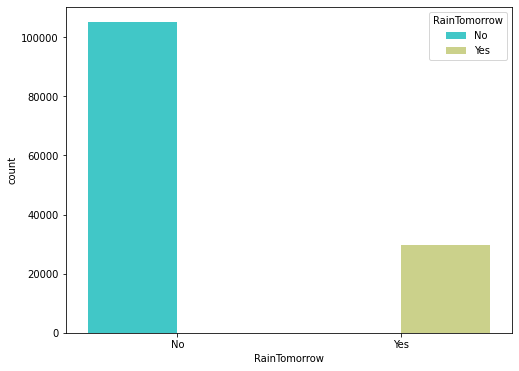

In [20]:
plt.rcParams['figure.figsize'] = 8,6
for col in df_cat:
    print(col,'Vs RainTomorrow\n')
    sns.countplot(df_cat[col],hue=df['RainTomorrow'],palette='rainbow')
    plt.show()

#### Inferences from the bivariate analysis of the categorical columns:
* Location does not seem to have much effect on Raintomorrow as only very few regions have very less chances of getting rain, all other regions are having good chances for rain
* Windgustdir seems to have a little effect on raintomorrow, when the value is very high then there is some chance for getting rain 
* Winddir9am is not having much effect on raintomorrow, in all directions the chance for rain is almost equal
* Winddir3pm is similar to winddir9am , all directions seem to have equal chances for getting rain
* It is a very informative variable as, if it rains today, then there is very much highchance that it will also rain tomorrow, if it does not rain today, then less chances for rain tomorrow

### Hypothesis Testing

##### For categorical Vs categorical, we perform chisquare test of independence
#### Null hypothesis: The feature does not have an effect on RainTomorrow
#### Alternate hypothesis: The feature has an effect on RainTomorrow

In [21]:
from scipy.stats import chi2_contingency
for col in df_cat:
    print('\n',col,'Vs RainTomorrow\n')
    print(chi2_contingency(pd.crosstab(df_cat[col],df['RainTomorrow'])))


 Location Vs RainTomorrow

(3399.4337894151504, 0.0, 48, array([[2341.2437774 ,  658.7562226 ],
       [1733.30080987,  487.69919013],
       [2295.97973103,  646.02026897],
       [2352.16958169,  661.83041831],
       [2186.72168809,  615.27831191],
       [2322.51382718,  653.48617282],
       [2324.85507096,  654.14492904],
       [2415.38316368,  679.61683632],
       [2309.24677911,  649.75322089],
       [2422.40689501,  681.59310499],
       [2227.3032469 ,  626.6967531 ],
       [2077.46364514,  584.53635486],
       [2139.89681254,  602.10318746],
       [2485.620477  ,  699.379523  ],
       [2239.78988038,  630.21011962],
       [2455.1843079 ,  690.8156921 ],
       [ 543.16855636,  152.83144364],
       [2308.46636451,  649.53363549],
       [1778.56485623,  500.43514377],
       [2329.53755851,  655.46244149],
       [2334.22004607,  656.77995393],
       [2129.75142284,  599.24857716],
       [2332.65921688,  656.34078312],
       [1852.70424251,  521.29575749],
      

#### So, the pvalue is less than alpha in all these columns so we can conclude that all the categorical features has an effect on RainTomorrow column

##### For numerical features with the target column, we perform normality test to decide upon the test to be performed.
#### Null hypothesis: Data is not skewed; skewness=0
#### Alternate hypothesis: Data is skewed; skewness!=0

In [22]:
from scipy.stats import shapiro
for i in df_num:
    print(i,'Vs RainTomorrow')
    st1= df[df['RainTomorrow']=='Yes'][i]
    st2= df[df['RainTomorrow']=='No'][i]
    print(shapiro(st1))
    print(shapiro(st2))
    print('\n')

MinTemp Vs RainTomorrow
ShapiroResult(statistic=0.9904187917709351, pvalue=1.7964253949074144e-39)
ShapiroResult(statistic=0.9958552122116089, pvalue=7.595037676640509e-43)


MaxTemp Vs RainTomorrow
ShapiroResult(statistic=0.9853681921958923, pvalue=0.0)
ShapiroResult(statistic=0.992247462272644, pvalue=0.0)


Rainfall Vs RainTomorrow
ShapiroResult(statistic=0.4478346109390259, pvalue=0.0)
ShapiroResult(statistic=0.24051612615585327, pvalue=0.0)


Evaporation Vs RainTomorrow
ShapiroResult(statistic=0.7672083973884583, pvalue=0.0)
ShapiroResult(statistic=0.7000080347061157, pvalue=0.0)


Sunshine Vs RainTomorrow
ShapiroResult(statistic=0.8195086717605591, pvalue=0.0)
ShapiroResult(statistic=0.8538370132446289, pvalue=0.0)


WindGustSpeed Vs RainTomorrow
ShapiroResult(statistic=0.9686630368232727, pvalue=0.0)
ShapiroResult(statistic=0.9632356762886047, pvalue=0.0)


WindSpeed9am Vs RainTomorrow
ShapiroResult(statistic=0.9602552652359009, pvalue=0.0)
ShapiroResult(statistic=0.962387502193

#### Everywhere, the pvalue is less than alpha, so the data is skewed. When data is skewed, we have to perform mannwhineyu test.

#### Null hypothesis : The feature does not have an effect on Target variable
#### Alternate hypothesis: The feature has an effect on Target variable

In [23]:
from scipy.stats import mannwhitneyu
for i in df_num:
    z=df[df['RainTomorrow']=='Yes'][i]
    w=df[df['RainTomorrow']=='No'][i]
    print('%s with RainTomorrow, pvalue is:'%i,mannwhitneyu(z,w)[1])
    print('\n')

MinTemp with RainTomorrow, pvalue is: 1.874291889111524e-182


MaxTemp with RainTomorrow, pvalue is: 0.0


Rainfall with RainTomorrow, pvalue is: 0.0


Evaporation with RainTomorrow, pvalue is: 7.07520566607518e-291


Sunshine with RainTomorrow, pvalue is: 0.0


WindGustSpeed with RainTomorrow, pvalue is: 0.0


WindSpeed9am with RainTomorrow, pvalue is: 9.012695126470728e-207


WindSpeed3pm with RainTomorrow, pvalue is: 1.208478393631464e-190


Humidity9am with RainTomorrow, pvalue is: 0.0


Humidity3pm with RainTomorrow, pvalue is: 0.0


Pressure9am with RainTomorrow, pvalue is: 0.0


Pressure3pm with RainTomorrow, pvalue is: 0.0


Cloud9am with RainTomorrow, pvalue is: 0.0


Cloud3pm with RainTomorrow, pvalue is: 0.0


Temp9am with RainTomorrow, pvalue is: 1.1880352956380302e-27


Temp3pm with RainTomorrow, pvalue is: 0.0


Year with RainTomorrow, pvalue is: 2.3093876932075082e-07


Month with RainTomorrow, pvalue is: 0.0004968119765654405


Specific_Day with RainTomorrow, pvalue is:

#### Here too the pvalues are all less than alpha, so we can conclude that all the numerical columns has an effect on the target variable

### Transformation and Encoding

In [24]:
# Since the data is skewed, we transform them, so that it will be good for building the model
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in df.select_dtypes(np.number):
    df[i] = pt.fit_transform(df[[i]])

In [25]:
# Changing the values in the target variable
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1,'No':0})
df['RainTomorrow'] = df['RainTomorrow'].astype('int')

In [26]:
# Encoding the categorical features with label encoding technique
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.select_dtypes('object'):
    df[i] = le.fit_transform(df[[i]])

In [27]:
# Dropping the date column before building the model as it is already split into 3 other features
df= df.drop('Date',axis=1)

### Model building

In [28]:
# Seperating the dependent variable and the independent variables
X = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [29]:
# Seperating into train and test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.7,random_state=42)

In [30]:
# Scaling the train and test data seperately so as the model will not be biased towards values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in xtrain.columns:
    xtrain[i]= sc.fit_transform(xtrain[[i]])
for i in xtest.columns:
    xtest[i]= sc.fit_transform(xtest[[i]])

In [31]:
# Importing the library for balancing the target variable
import imblearn
from imblearn.over_sampling import SMOTE

In [32]:
# Balancing the train set using SMOTE technique
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(xtrain,ytrain)

In [33]:
# Importing the metrices
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(x_sm ,y_sm)
ypred_lr = lr.predict(xtest)
print('Training Score',lr.score(x_sm,y_sm))
print('Testing Score',lr.score(xtest,ytest))
print('\n',classification_report(ytest,ypred_lr))
print(confusion_matrix(ytest,ypred_lr))

Training Score 0.7912722235049642
Testing Score 0.7933229313718206

               precision    recall  f1-score   support

           0       0.93      0.80      0.86     31409
           1       0.52      0.78      0.63      8968

    accuracy                           0.79     40377
   macro avg       0.72      0.79      0.74     40377
weighted avg       0.84      0.79      0.81     40377

[[25052  6357]
 [ 1988  6980]]


##### Checking for multicollinearity 

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

VIF = pd.DataFrame([vif(X.values,i) for i in range(X.shape[1])],columns=['VIF'],index=X.columns)
VIF

,VIF
Location,2.868168
MinTemp,9.320411
MaxTemp,45.117772
Rainfall,6.147000
Evaporation,1.624831
Sunshine,1.978759
WindGustDir,6.070561
WindGustSpeed,2.539988
WindDir9am,3.999798
WindDir3pm,5.736050


#### Backward Feature elimination

In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs2 = sfs(lr, forward=False, verbose=False, scoring='neg_mean_squared_error', k_features=20)
sfs2 = sfs2.fit(x_sm,y_sm)
feat_names = list(sfs2.k_feature_names_)
print(feat_names)

['Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Year', 'Month', 'Specific_Day']


##### Based on VIF and Backward elimination we can eliminate few features

In [37]:
x_sm = x_sm.drop(['MaxTemp','Temp3pm','Year','Specific_Day'],axis=1)
xtest = xtest.drop(['MaxTemp','Temp3pm','Year','Specific_Day'],axis=1)

#### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=7)
dt = dt.fit(x_sm,y_sm)
ypred_dt = dt.predict(xtest)
print('Training Score', dt.score(x_sm,y_sm))
print('Testing Score', dt.score(xtest,ytest))
print('\n',classification_report(ytest,ypred_dt))
print(confusion_matrix(ytest,ypred_dt))

Training Score 0.7791027747972891
Testing Score 0.7704633826188176

               precision    recall  f1-score   support

           0       0.92      0.77      0.84     31409
           1       0.49      0.76      0.60      8968

    accuracy                           0.77     40377
   macro avg       0.70      0.77      0.72     40377
weighted avg       0.82      0.77      0.79     40377

[[24292  7117]
 [ 2151  6817]]


AUC: 0.8415959331304126


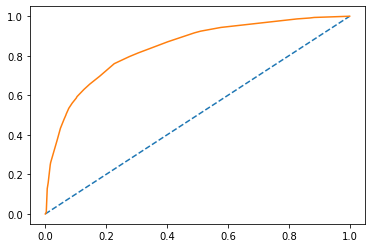

In [39]:
plt.rcParams['figure.figsize'] = 6,4
from sklearn.metrics import roc_auc_score,roc_curve
y_prob_dt = dt.predict_proba(xtest)[:,1]
auc_dt = roc_auc_score(ytest,y_prob_dt)
fpr_dt , tpr_dt, thr_dt = roc_curve(ytest,y_prob_dt)
print('AUC:',auc_dt)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_dt,tpr_dt)
plt.show()

#### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_depth=8,min_samples_split=7)
rf = rf.fit(x_sm,y_sm)
ypred_rf = rf.predict(xtest)
print('Training Score',rf.score(x_sm,y_sm))
print('Testing Score', rf.score(xtest,ytest))
print('\n',classification_report(ytest,ypred_rf))
print(confusion_matrix(ytest,ypred_rf))

Training Score 0.8302389069227322
Testing Score 0.7726180746464572

               precision    recall  f1-score   support

           0       0.93      0.77      0.84     31409
           1       0.49      0.80      0.61      8968

    accuracy                           0.77     40377
   macro avg       0.71      0.78      0.72     40377
weighted avg       0.83      0.77      0.79     40377

[[24042  7367]
 [ 1814  7154]]


AUC: 0.864008811658698


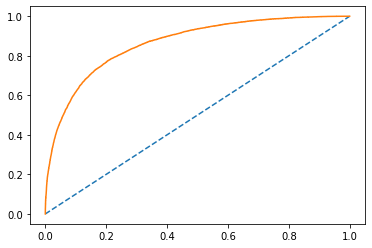

In [41]:
y_prob_rf = rf.predict_proba(xtest)[:,1]
auc_rf = roc_auc_score(ytest,y_prob_rf)
fpr_rf , tpr_rf, thr_rf = roc_curve(ytest,y_prob_rf)
print('AUC:',auc_rf)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_rf,tpr_rf)
plt.show()

#### Ada Boost Classifier

In [42]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=50)
adb = adb.fit(x_sm,y_sm)
ypred_abd = adb.predict(xtest)
print('Training Score',adb.score(x_sm,y_sm))
print('Testing Score', adb.score(xtest,ytest))
print('\n',classification_report(ytest,ypred_abd))
print(confusion_matrix(ytest,ypred_abd))

Training Score 0.8252882773982371
Testing Score 0.7165713153527998

               precision    recall  f1-score   support

           0       0.94      0.68      0.79     31409
           1       0.43      0.85      0.57      8968

    accuracy                           0.72     40377
   macro avg       0.68      0.76      0.68     40377
weighted avg       0.83      0.72      0.74     40377

[[21355 10054]
 [ 1390  7578]]


AUC: 0.8539742244626157


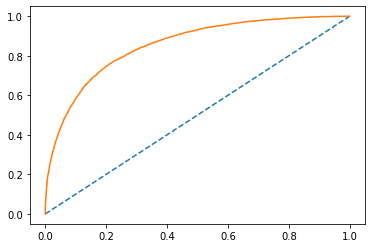

In [43]:
y_prob_adb = adb.predict_proba(xtest)[:,1]
auc_adb = roc_auc_score(ytest,y_prob_adb)
fpr_adb , tpr_adb, thr_adb = roc_curve(ytest,y_prob_adb)
print('AUC:',auc_adb)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_adb,tpr_adb)
plt.show()

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50,max_depth=4)
gb = gb.fit(x_sm,y_sm)
ypred_gb = gb.predict(xtest)
print('Training Score',gb.score(x_sm,y_sm))
print('Testing Score',gb.score(xtest,ytest))
print('\n', classification_report(ytest,ypred_gb))
print(confusion_matrix(ytest,ypred_gb))

Training Score 0.8496135928395833
Testing Score 0.6647101072392699

               precision    recall  f1-score   support

           0       0.95      0.60      0.74     31409
           1       0.39      0.88      0.54      8968

    accuracy                           0.66     40377
   macro avg       0.67      0.74      0.64     40377
weighted avg       0.82      0.66      0.69     40377

[[18972 12437]
 [ 1101  7867]]


AUC: 0.8466596231345476


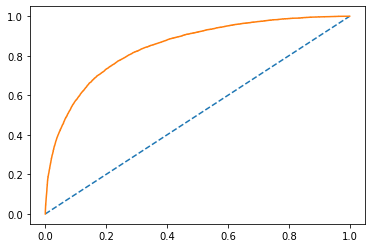

In [45]:
y_prob_gb = gb.predict_proba(xtest)[:,1]
auc_gb = roc_auc_score(ytest,y_prob_gb)
fpr_gb , tpr_gb, thr_gb = roc_curve(ytest,y_prob_gb)
print('AUC:',auc_gb)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr_gb,tpr_gb)
plt.show()

### Random Forest is the best model from the above models, checking the feature importance based on RF model

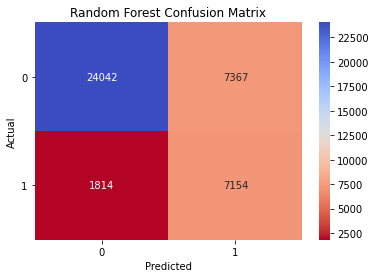

In [46]:
cm = confusion_matrix(ytest,ypred_rf)
sns.heatmap(cm,annot=True,fmt='g',cmap='coolwarm_r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.yticks(rotation=0)
plt.show()

In [47]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision Score:',precision_score(ytest,ypred_rf))
print('Recall Score   :', recall_score(ytest,ypred_rf))
print('F1 Score       :',f1_score(ytest,ypred_rf))
print('Accuracy score :',accuracy_score(ytest,ypred_rf))
print('ROC AUC Score  :',roc_auc_score(ytest,y_prob_rf))

Precision Score: 0.49266579436677915
Recall Score   : 0.7977252453166815
F1 Score       : 0.6091361914087445
Accuracy score : 0.7726180746464572
ROC AUC Score  : 0.864008811658698


In [48]:
important_features = pd.DataFrame({'Features': x_sm.columns, 
                                   'Importance': rf.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False, inplace=True)
important_features

,Features,Importance
12,Humidity3pm,0.316484
2,Rainfall,0.120287
16,Cloud3pm,0.113665
4,Sunshine,0.093076
6,WindGustSpeed,0.061980
18,RainToday,0.060691
14,Pressure3pm,0.050674
11,Humidity9am,0.049687
13,Pressure9am,0.038103
15,Cloud9am,0.037214


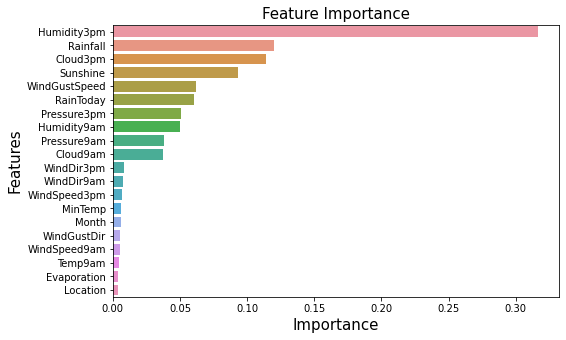

In [49]:
plt.rcParams['figure.figsize'] = 8,5
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

* Humidity3pm has the most influence on the RainTomorrow feature
* So, this should be considered for predicting if it will rain tomorrow
* Followed by the features, Cloud3pm, Rainfall , Sunshine and RainToday have more effect on the RainTomorrow feature.
#### The model is 76% accurate and the false negative is also very less. So, this model has a good potential.